* PassengerId: type should be integers
* Survived: Survived or Not
* Pclass: Class of Travel
* Name: Name of Passenger
* Sex: Gender
* Age: Age of Passengers
* SibSp: Number of Sibling/Spouse aboard
* Parch: Number of Parent/Child aboard
* Ticket: Ticket number
* Fare: Fare for ticket
* Cabin: Cabin Number
* Embarked: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#import data
data = pd.read_csv("titanic-passengers.csv",delimiter=";")

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [34]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
data = data.drop("Cabin",axis=1)

In [37]:
#fill with the mode
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

In [38]:
#fill with mean
data['Age'] = data['Age'].replace(np.nan, data.Age.mean())

In [39]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
 #replace male as 1 and female as 0
data["Sex"] = data["Sex"].map({"male": 1, "female":0})

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Survived"] = le.fit_transform(data["Survived"].values)

In [42]:
data["Embarked"] = le.fit_transform(data["Embarked"].values)

In [43]:
# drop non usefull variables
data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [44]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2


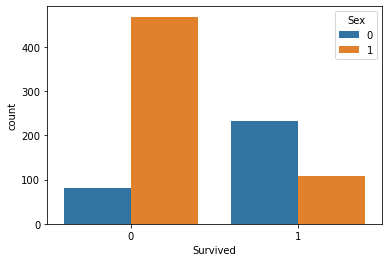

In [16]:
sns.countplot(x='Survived',hue = 'Sex' ,data=data)
plt.show()

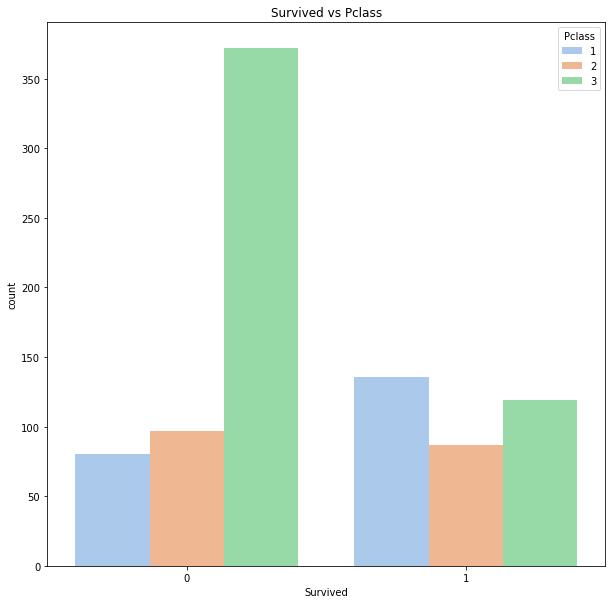

In [64]:
plt.figure(figsize=(10,10))
sns.countplot(x='Survived', hue='Pclass', data=data, palette='pastel')
plt.title('Survived vs Pclass')
plt.show()

In [45]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


In [50]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    mask = np.triu(np.ones_like(corr, dtype=bool))


    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True,
        mask = mask,

        annot_kws = { 'fontsize' : 12 }

        )

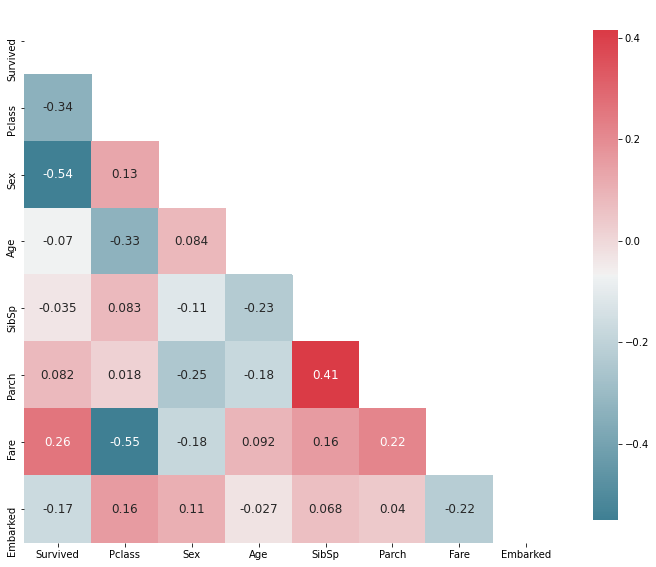

In [51]:
plot_correlation_map(data)

In [52]:
data.groupby(by=['Pclass']).mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [53]:
#.strip(Remove spaces at the beginning and at the end of the string)
data['Title'] = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
Mme               1
Sir               1
Jonkheer          1
the Countess      1
Capt              1
Don               1
Lady              1
Name: Title, dtype: int64

In [54]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mr
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mr


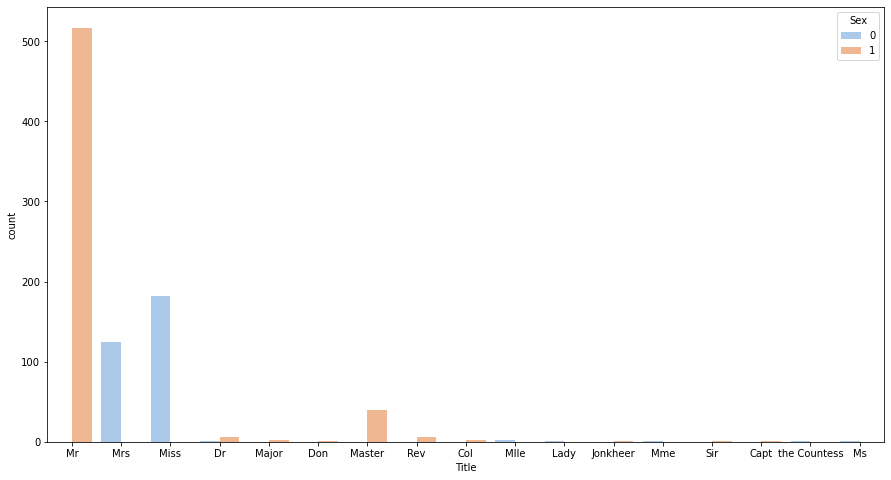

In [24]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Title',hue = 'Sex' ,data=data,palette='pastel')

<Figure size 1440x3600 with 0 Axes>

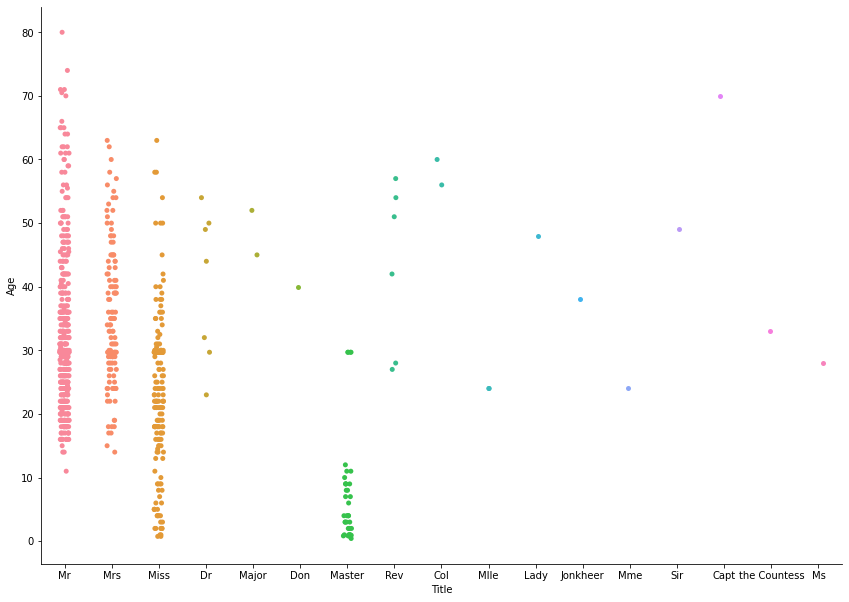

In [71]:
plt.figure(figsize=(20,50))
sns.catplot(x="Title", y="Age", data=data , height=8.27, aspect=11.7/8.27)
#sns.relplot(x="Title", y="Age", data=data , height=20)
plt.show()

In [72]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" ,

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master"

                    }


In [73]:
data.Title = data.Title.map(Title_Dictionary)

In [74]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mrs
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mrs


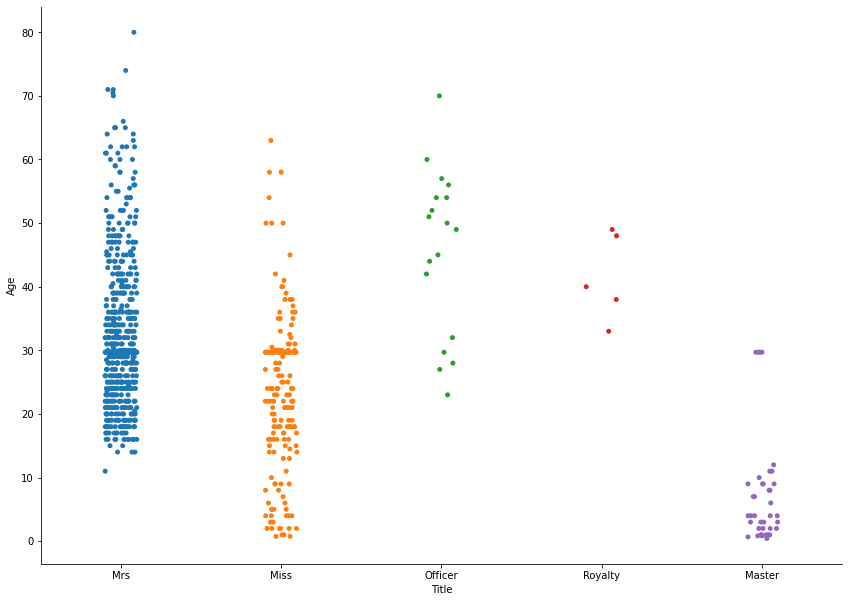

In [32]:
sns.catplot(x="Title", y="Age", data=data , height=8.27, aspect=11.7/8.27)

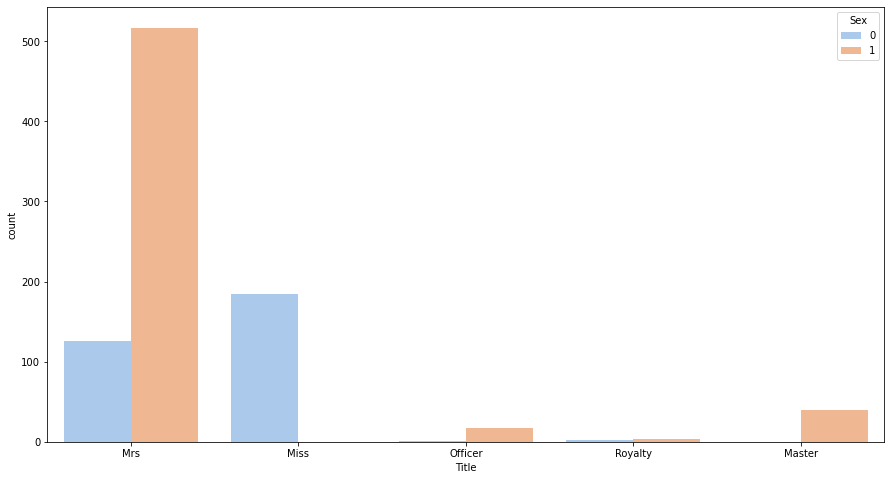

In [33]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Title',hue = 'Sex' ,data=data,palette='pastel')

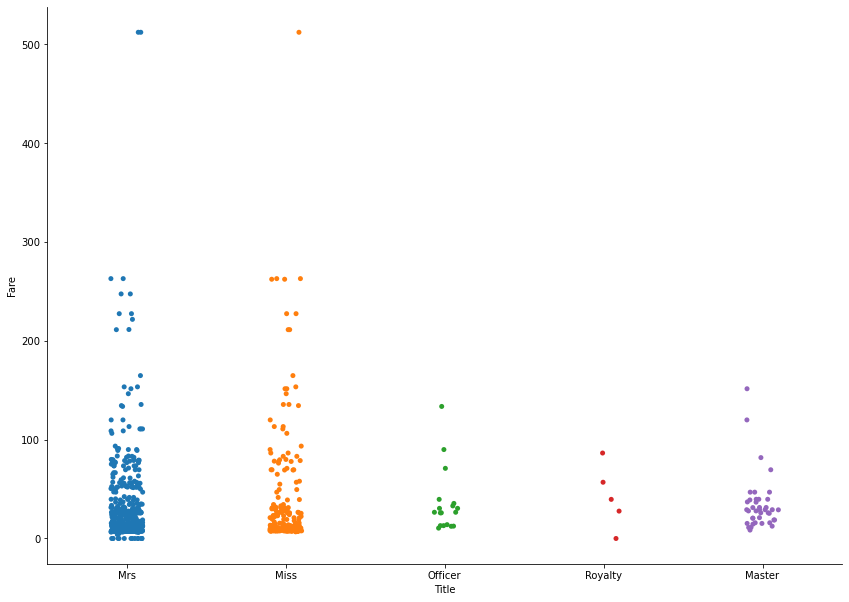

In [34]:
sns.catplot(x="Title", y="Fare", data=data , height=8.27, aspect=11.7/8.27)

In [75]:
data['family_size'] = data['SibSp'] + data['Parch'] + 1
print( data[["family_size","Survived"]].groupby(["family_size"], as_index = False).mean() )

   family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000
